In [ ]:
import pandas as pd
import nltk
import re
from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

from tqdm import tqdm

In [3]:
songs = pd.read_csv("lyrics_genre.csv")

In [85]:
songs['genre'].unique()

array(['europop', 'dance pop', 'comic', 'pop', 'rock', 'mellow gold',
       'opm', 'country', 'operatic pop', 'folk', 'new wave pop',
       'christian music', 'soft rock', 'soul', 'adult standards', 'disco',
       'irish folk', 'tin pan alley', 'pop rock', 'dance rock',
       'art rock', 'indonesian pop', 'pop rap', 'christmas', 'rap',
       'celtic', 'classic finnish rock', 'post-grunge', 'rap rock',
       'k-pop', 'punk', 'new romantic', 'modern rock', 'electronic',
       'classic rock', 'world', 'celtic rock', 'permanent wave',
       'traditional country', 'edm', 'roots rock', 'acid jazz', 'worship',
       'folk rock', 'album rock', 'gospel', 'classic bollywood',
       'hollywood', 'rock-and-roll', 'reggae', 'alternative rock',
       'power metal', 'britpop', 'mizrahi', 'progressive metal',
       'neo mellow', 'hip hop', 'dark wave', 'lo-fi', 'alternative metal',
       "canadian children's music", 'reggae fusion', 'canadian rock',
       'emo', 'nu metal', 'chamber pop'

In [158]:
genres = dict(songs["genre"].value_counts())

In [164]:
genres.values()

dict_values([20277, 5347, 5266, 2716, 2570, 1290, 1239, 1100, 1069, 1064, 744, 725, 572, 541, 445, 419, 394, 393, 383, 367, 341, 336, 302, 300, 240, 235, 206, 191, 177, 177, 174, 174, 169, 161, 159, 158, 148, 132, 115, 100, 98, 97, 88, 88, 85, 83, 75, 74, 71, 71, 69, 67, 63, 63, 60, 52, 46, 41, 40, 36, 35, 32, 30, 30, 30, 28, 25, 25, 24, 20, 18, 18, 18, 17, 12, 10, 9, 8, 5, 5, 3, 3, 2, 1])

In [110]:
songs[songs['genre']=='k-pop']

,Unnamed: 0,artist,song,link,text,genre
5427,5695,Exo,Exodus,/e/exo/exodus_21097244.html,Stand up! oechyeodo gyeolgugen dabeun no \nBu...,k-pop
5428,5696,Exo,Moonlight,/e/exo/moonlight_21082834.html,"Yeah, stop, stop. Those wings will get wet oh,...",k-pop
5429,5697,Exo-K,Hurt,/e/exo+k/hurt_21098367.html,[D.O] yudok jitge baen neoui hyanggie \nBari ...,k-pop
5430,5698,Exo-K,Overdose,/e/exo+k/overdose_21082897.html,Come in \n \n[Baekhyun] Modeungeol geolgo ne...,k-pop
29804,32196,Exo,Run,/e/exo/run_21082836.html,Eodideun joha uri oneulbam tteonabollae? Tteon...,k-pop


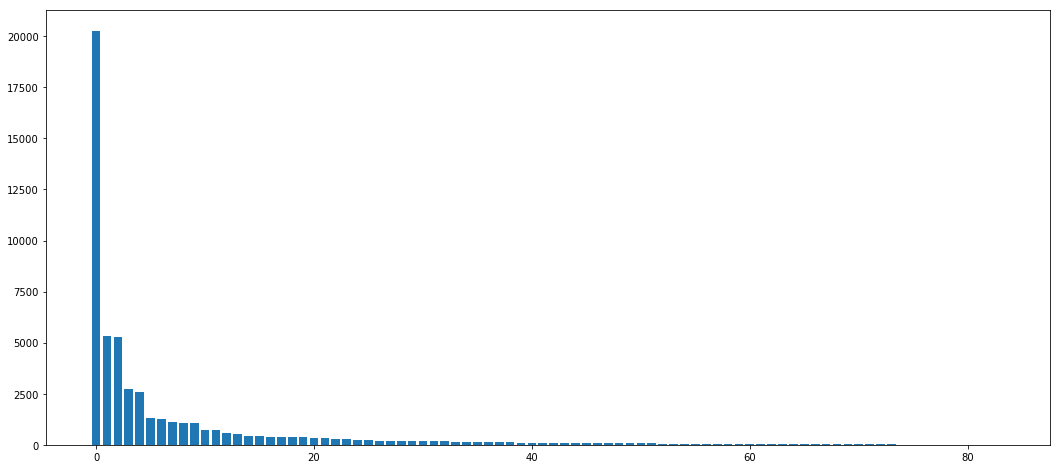

In [198]:
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(list(genres.keys())))
plt.figure(figsize = (18,8))
plt.bar(y_pos, list(genres.values()))
#plt.xticks(y_pos, list(genres.index))
plt.show()

In [174]:
short_genre = {k:v for k,v in genres.items() if v > 200}

In [202]:
print("We still keep about", sum(short_genre.values()), "lyrics")

We still keep about 48881 lyrics


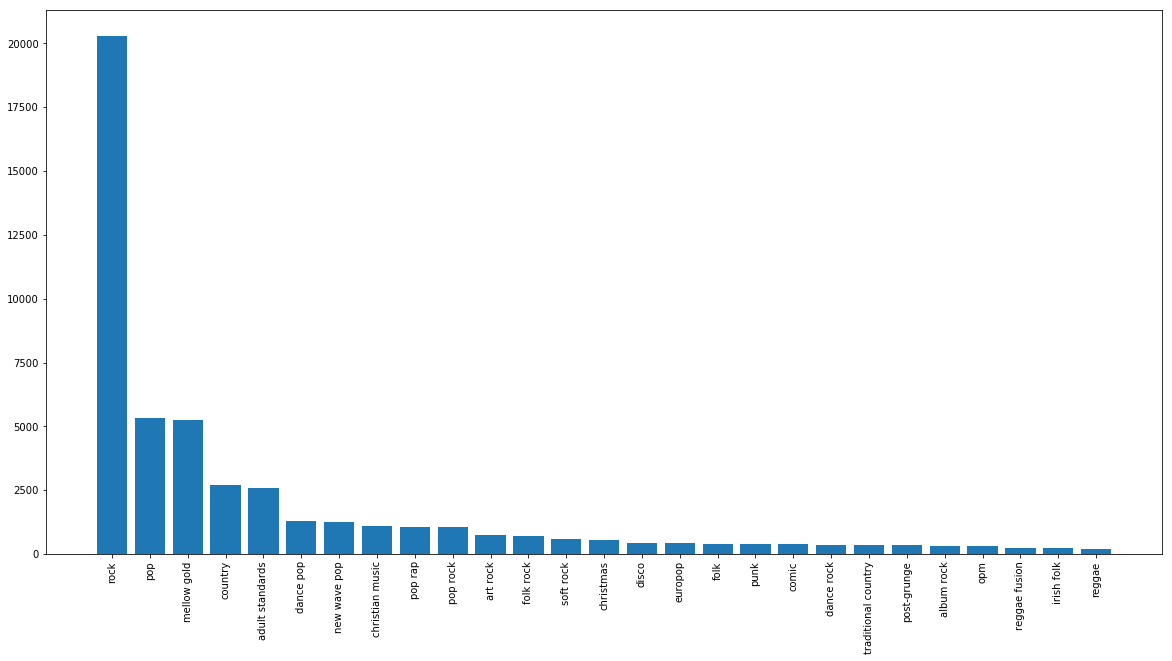

In [190]:
y_pos = np.arange(len(list(short_genre.keys())))
y_pos
plt.figure(figsize = (20,10))
plt.bar(y_pos, list(short_genre.values()))
plt.xticks(y_pos, list(short_genre.keys()))
plt.xticks(rotation=90)
plt.show()

In [194]:
remove_genres = [k for k,v in genres.items() if v <= 200]

In [208]:
for a in remove_genres:
    songs = songs[songs['genre'] != a]

In [ ]:
songs['text'].mean()

In [213]:
stopWORDS = stopwords.words('english')
tokenized = []
tokenizer = RegexpTokenizer(r'\w+')

for lyrics in tqdm(songs['text']):
    raw = lyrics.lower()
    tokens = tokenizer.tokenize(raw)
    cleaned = [t for t in tokens if t not in stopWORDS]
    tokenized.append(cleaned)

100%|██████████| 48881/48881 [00:41<00:00, 1187.53it/s]


In [214]:
dictionary = corpora.Dictionary(tokenized)
corpus_tokenized = [dictionary.doc2bow(text) for text in tokenized]

In [216]:
lda_model = models.LdaModel(corpus=corpus_tokenized, num_topics=10, id2word=dictionary)

In [218]:
for idx in range(10):
    print("Topic %s:" % idx, lda_model.print_topic(idx, 10))

Topic 0: 0.025*"like" + 0.016*"nigga" + 0.013*"man" + 0.013*"fuck" + 0.012*"shit" + 0.010*"bitch" + 0.010*"niggas" + 0.006*"em" + 0.006*"know" + 0.006*"cause"
Topic 1: 0.011*"come" + 0.010*"us" + 0.010*"world" + 0.009*"light" + 0.008*"sun" + 0.008*"see" + 0.008*"day" + 0.007*"sky" + 0.007*"night" + 0.007*"god"
Topic 2: 0.018*"hey" + 0.015*"got" + 0.014*"little" + 0.014*"come" + 0.013*"gonna" + 0.013*"night" + 0.012*"dance" + 0.012*"girl" + 0.012*"go" + 0.011*"baby"
Topic 3: 0.039*"get" + 0.012*"time" + 0.011*"back" + 0.010*"got" + 0.010*"want" + 0.008*"see" + 0.008*"head" + 0.008*"like" + 0.007*"know" + 0.007*"go"
Topic 4: 0.059*"na" + 0.056*"baby" + 0.027*"ah" + 0.018*"alright" + 0.013*"de" + 0.012*"ha" + 0.010*"di" + 0.008*"ba" + 0.008*"c" + 0.007*"eh"
Topic 5: 0.060*"yeah" + 0.029*"got" + 0.026*"la" + 0.021*"ya" + 0.018*"like" + 0.012*"get" + 0.011*"yo" + 0.010*"da" + 0.009*"wanna" + 0.009*"whoa"
Topic 6: 0.102*"oh" + 0.023*"take" + 0.018*"gonna" + 0.015*"home" + 0.013*"run" + 0.009

In [217]:
print(lda_model.print_topics(num_topics=10, num_words=10))

[(0, '0.025*"like" + 0.016*"nigga" + 0.013*"man" + 0.013*"fuck" + 0.012*"shit" + 0.010*"bitch" + 0.010*"niggas" + 0.006*"em" + 0.006*"know" + 0.006*"cause"'), (1, '0.011*"come" + 0.010*"us" + 0.010*"world" + 0.009*"light" + 0.008*"sun" + 0.008*"see" + 0.008*"day" + 0.007*"sky" + 0.007*"night" + 0.007*"god"'), (2, '0.018*"hey" + 0.015*"got" + 0.014*"little" + 0.014*"come" + 0.013*"gonna" + 0.013*"night" + 0.012*"dance" + 0.012*"girl" + 0.012*"go" + 0.011*"baby"'), (3, '0.039*"get" + 0.012*"time" + 0.011*"back" + 0.010*"got" + 0.010*"want" + 0.008*"see" + 0.008*"head" + 0.008*"like" + 0.007*"know" + 0.007*"go"'), (4, '0.059*"na" + 0.056*"baby" + 0.027*"ah" + 0.018*"alright" + 0.013*"de" + 0.012*"ha" + 0.010*"di" + 0.008*"ba" + 0.008*"c" + 0.007*"eh"'), (5, '0.060*"yeah" + 0.029*"got" + 0.026*"la" + 0.021*"ya" + 0.018*"like" + 0.012*"get" + 0.011*"yo" + 0.010*"da" + 0.009*"wanna" + 0.009*"whoa"'), (6, '0.102*"oh" + 0.023*"take" + 0.018*"gonna" + 0.015*"home" + 0.013*"run" + 0.009*"back" +

In [223]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence

/Users/aprilchung/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [222]:
X_train, X_test, y_train, y_test = train_test_split(songs['text'], songs['genre'], test_size=0.33, random_state=728)

In [225]:
#maxlen = max(songs['text'].str.len())
maxlen

3997

In [ ]:
maxlen = max(songs['text'].str.len())
X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [ ]:
max_features = 100000
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(32))
model.add(Dense(1, activation ='sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs = 10, batch_size = 64, 
                    validation_split = 0.2,
                    verbose=1)